**Project introduction:**

*   **Problem we are investigating:** Being able to tell when is the best time to sell a product is a big problem for companies. The purpose of this project is to see if we can tell the best time to sell TVs is based on customer reviews of a product. We will do this by analyzing data pertaining to both TV reviews along with data related to total TV sales for each month of the year.

*   **Discuss the data:** We are working with two data sets in this project. Our first data set is Date and model wise sale.csv. It contains the date of sale, model, and sale quantity of TV's across 45 Walmart locations. The second data set contains the star rating and date made of reviews for various TV's on Walmarts website.



**Changes since the proposal:**

*   In our proposal we were only using the data set of reviews. We have decided to also use Date and model wise sale.csv.
*   What we decided to do was also look at data pertaining to total sales of TVs . We wanted to add this data to our project because we thought comparing total tv sales with the reviews would allow us to have a more accurate prediction about when the best month to sell would be.



**How we have prepared our data:**

*   **Date and model wise sale data set:** On of the columns, Model, in this data set was unnecessary for our purposes. Our first step was deleting this column from the data set. We then group the Date column by month and then get the count of all the TV's sold for that month. We then make some graphs to better visualize the data.
*   **Reviews data set:** When collecting data we decided that we only wanted the month and the star count in our csv file so that's what we went ahead and did. From there we graph the data in order to give a better visualization how reviews and distributed.



In [12]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# STEP1: upload the folder on your google drive
# Step2: Find the URL - it will look something like below - Now we set the working directory to the folder
%cd "/content/drive/MyDrive/CS 418/cs418_project"
!pwd

/content/drive/MyDrive/CS 418/cs418_project
/content/drive/MyDrive/CS 418/cs418_project


In [1]:
# imports
import pandas as pd
import csv
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# read the Date and model wise sale file, remove the 'Model' column from each row, and then write the modified rows back to a new CSV file.

# define the input and output file paths
input_file = 'Date and model wise sale.csv'
output_file = 'new_file.csv'

# open the input file in read mode
with open(input_file, 'r', newline='') as infile:
    # open the output file in write mode
    with open(output_file, 'w', newline='') as outfile:
        reader = csv.DictReader(infile)
        fieldnames = ['Date', 'Count']
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)

        writer.writeheader()

        for row in reader:
            new_row = {key: value for key, value in row.items() if key != 'Model'} # create a new dictionary with out the 'Model' column
            writer.writerow(new_row) # write the new row to the output CSV file

# print the first 10 rows of new_file.csv to make sure we did it right

# open the CSV file in read mode
with open('new_file.csv', 'r') as file:
    csv_reader = csv.reader(file)
    row_count = 0

    for row in csv_reader:
        print(row)

        row_count += 1

        if row_count >= 10:
            break


['Date', 'Count']
['31-Aug-16', '5']
['31-Aug-16', '3']
['31-Aug-16', '4']
['31-Aug-16', '10']
['31-Aug-16', '57']
['31-Aug-16', '59']
['31-Aug-16', '17']
['31-Aug-16', '653']
['31-Aug-16', '8']


In [16]:
# group the Date column by month and then get the count of all the TV's sold for that month

input_file = 'new_file.csv' # create a new file

monthly_counts = defaultdict(int) # store counts for each month

# open the input CSV file
with open(input_file, 'r') as file:
    csv_reader = csv.reader(file)

    next(csv_reader) # skip the header row

    for row in csv_reader:
        date_str = row[0]
        date = datetime.strptime(date_str, '%d-%b-%y')

        # increment the count for the month
        month = date.strftime('%b')
        count = int(row[1])
        monthly_counts[month] += count

# create a DataFrame
df = pd.DataFrame(list(monthly_counts.items()), columns=['Month', 'TVs Sold'])
print(df)

   Month  TVs Sold
0    Aug    703693
1    Jul    808157
2    Jun    481399
3    May    321164
4    Apr    270841
5    Mar    281343
6    Feb    260113
7    Jan    251353
8    Dec    214639
9    Nov    218058
10   Oct    296351
11   Sep    351850


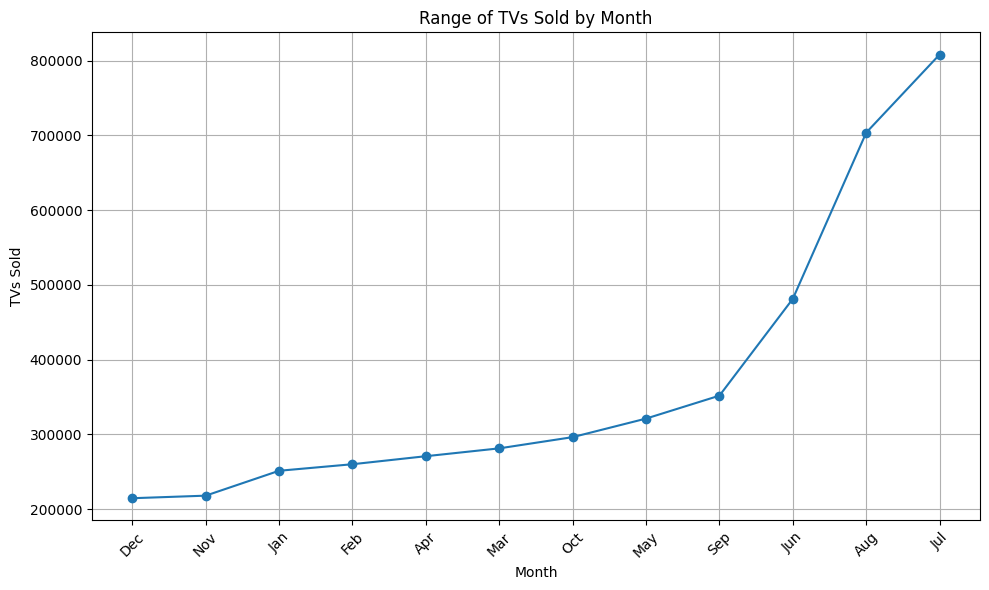

In [17]:
# make a graph of the range of values in the data set

df_sorted = df.sort_values(by='TVs Sold') # sort the DataFrame in ascending order

# create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Month'], df_sorted['TVs Sold'], marker='o', linestyle='-')
plt.title('Range of TVs Sold by Month')
plt.xlabel('Month')
plt.ylabel('TVs Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# show the plot
plt.show()

**Analysis of Sales Graph:**

As you can see there is a big spike in sales starting in the month of June. We beleve this is because of summer sales.

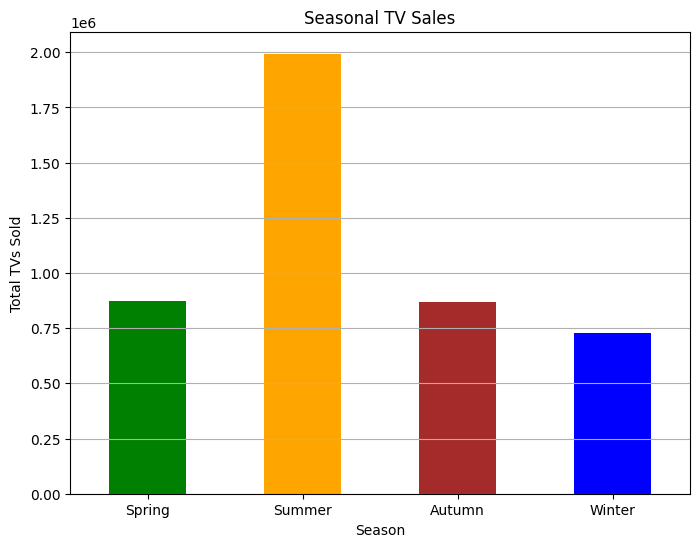

In [18]:
# make a plot to show how many TV sales are in each season

# define the data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
tv_sold = [251353, 260113, 281343, 270841, 321164, 481399, 808157, 703693, 351850, 296351, 218058, 214639]

# define the seasons and what months are in each season
spring_months = ['Mar', 'Apr', 'May']
summer_months = ['Jun', 'Jul', 'Aug']
autumn_months = ['Sep', 'Oct', 'Nov']
winter_months = ['Dec', 'Jan', 'Feb']

df = pd.DataFrame({'Month': months, 'TVs Sold': tv_sold}) # create a dataFrame

# add a new column called season for each month
df['Season'] = df['Month'].apply(lambda x: 'Spring' if x in spring_months
                                  else 'Summer' if x in summer_months
                                  else 'Autumn' if x in autumn_months
                                  else 'Winter')

season_sales = df.groupby('Season')['TVs Sold'].sum().reindex(['Spring', 'Summer', 'Autumn', 'Winter']) # group TV sales by season and sum all the TV sales that have the same season

# plot
plt.figure(figsize=(8, 6))
season_sales.plot(kind='bar', color=['green', 'orange', 'brown', 'blue'])
plt.title('Seasonal TV Sales')
plt.xlabel('Season')
plt.ylabel('Total TVs Sold')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Analysis of Sales Graph:**

As you can see Summer has the most TV sales by a large margin. This gives more crediblity to our assumption that summer sales cause a larger increase in sales.

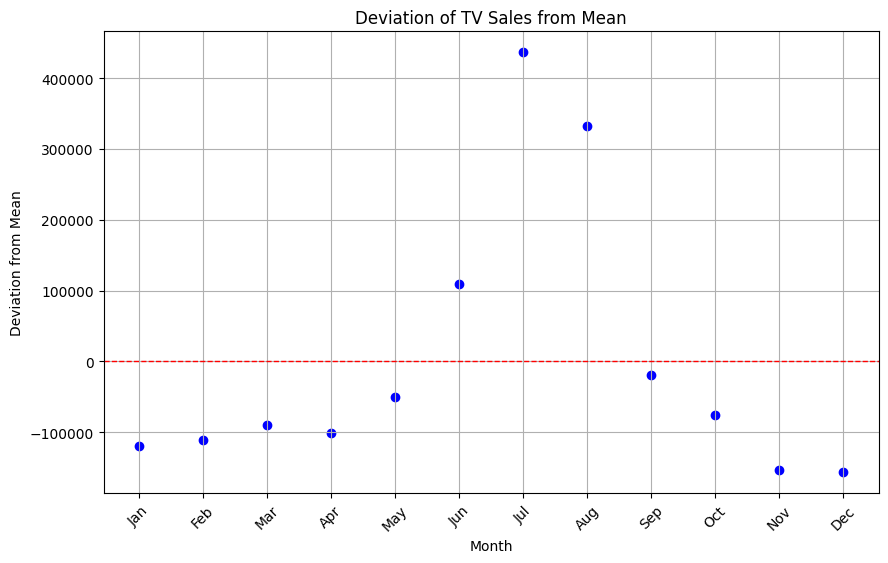

In [19]:
# make a plot to show how far away each month is from the mean number of sales

mean_sale = np.mean(tv_sold) # calculate the mean number of TV sales

away_from_mean = [sale - mean_sale for sale in tv_sold] # calculate how far away each TV sale is from the mean

# plot
plt.figure(figsize=(10, 6))
plt.scatter(months, away_from_mean, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # add a horizontal line to show where the mean is
plt.title('Deviation of TV Sales from Mean')
plt.xlabel('Month')
plt.ylabel('Deviation from Mean')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Analysis of Sales Graph:**

This graph shows how far away each month is from the mean number of sales.



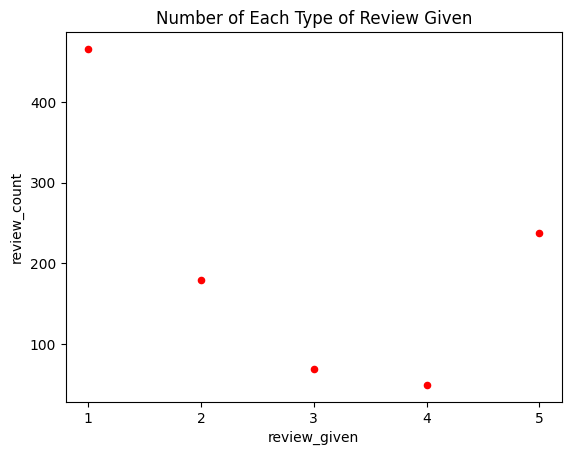

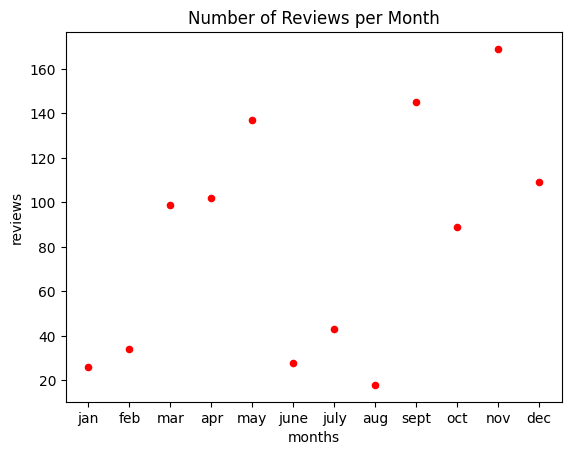

In [20]:
reviews = 'TV Reviews - Sheet1_new.csv'

df = pd.read_csv(reviews)
january_count = 0
february_count = 0
march_count = 0
april_count = 0
may_count = 0
june_count = 0
july_count = 0
august_count = 0
september_count = 0
october_count = 0
november_count = 0
december_count = 0

five_count = 0
four_count = 0
three_count = 0
two_count = 0
one_count = 0

for i in df.index:
  if df['Month'][i] == 2:
    february_count += 1
  if df['Review'][i] == 5:
    five_count += 1
  if df['Review'][i] == 4:
    four_count += 1
  if df['Review'][i] == 3:
    three_count += 1
  if df['Review'][i] == 2:
    two_count += 1
  if df['Review'][i] == 1:
    one_count += 1
  if df['Month'][i] == 1:
    january_count += 1
  if df['Month'][i] == 3:
    march_count += 1
  if df['Month'][i] == 4:
    april_count += 1
  if df['Month'][i] == 5:
    may_count += 1
  if df['Month'][i] == 6:
    june_count += 1
  if df['Month'][i] == 7:
    july_count += 1
  if df['Month'][i] == 8:
    august_count += 1
  if df['Month'][i] == 9:
    september_count += 1
  if df['Month'][i] == 10:
    october_count += 1
  if df['Month'][i] == 11:
    november_count += 1
  if df['Month'][i] == 12:
    december_count += 1

month_totals = {'months': ['jan'] + ['feb'] + ['mar'] + ['apr'] + ['may'] + ['june'] + ['july'] + ['aug'] + ['sept'] + ['oct']
                 + ['nov'] + ['dec'],
                'reviews': [january_count] + [february_count] + [march_count] + [april_count] + [may_count] + [june_count] + [july_count] +[august_count] + [september_count] + [october_count]
                + [november_count] + [december_count]
                }

review_totals = {'review_given': ['1'] + ['2'] + ['3'] + ['4'] + ['5'],
                 'review_count': [one_count] + [two_count] + [three_count] + [four_count] + [five_count]
                 }

month_data_frame = pd.DataFrame(month_totals)
review_data_frame = pd.DataFrame(review_totals)

review_data_frame.plot(kind='scatter',
        x='review_given',
        y = 'review_count',
        color='red')
plt.title('Number of Each Type of Review Given')

month_data_frame.plot(kind='scatter',
        x='months',
        y = 'reviews',
        color='red')

# set the title
plt.title('Number of Reviews per Month')

# show the plot
plt.show()


#### Analysis of Reviews Graphs

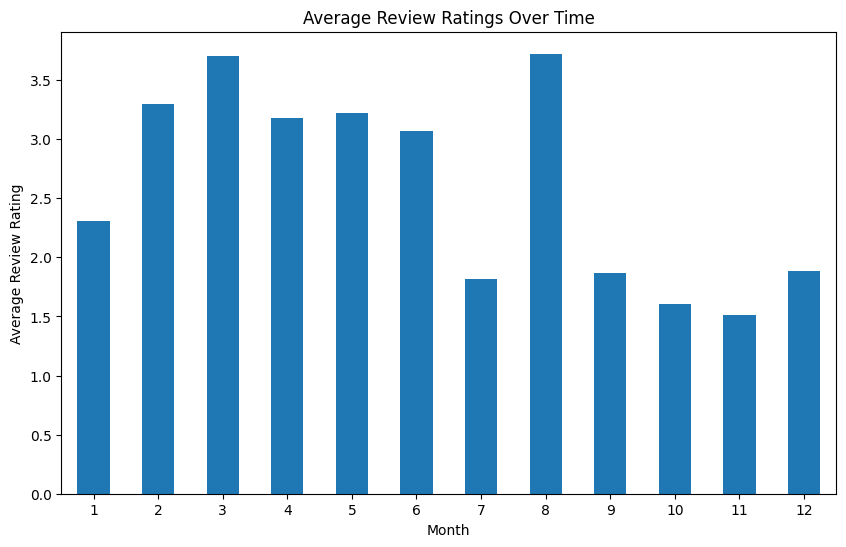

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TV Reviews - Sheet1_new.csv')


plt.figure(figsize=(10, 6))
df.groupby('Month')['Review'].mean().plot(kind='bar')
plt.title('Average Review Ratings Over Time')
plt.xlabel('Month')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=0)
plt.savefig('avg_review_rating.png')
plt.show()


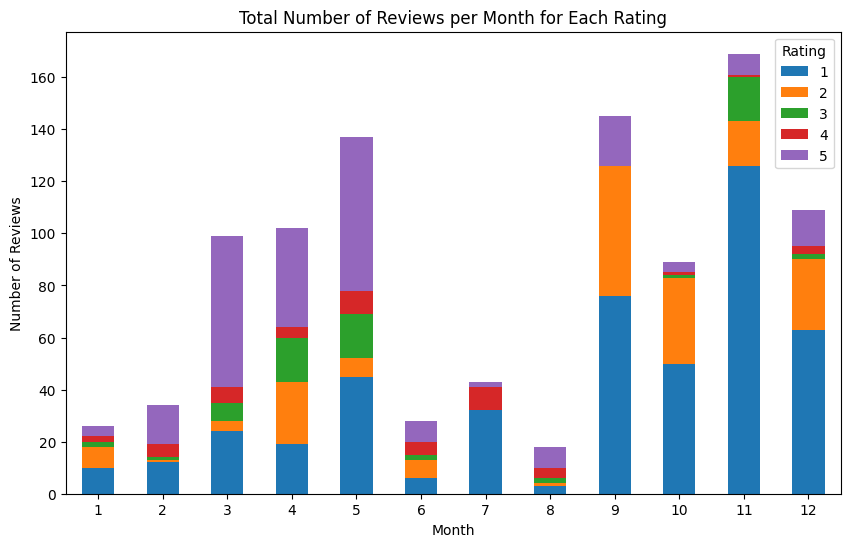

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TV Reviews - Sheet1_new.csv')

grouped = df.groupby(['Month', 'Review']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Number of Reviews per Month for Each Rating')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Rating')
plt.savefig('total_per_month.png')
plt.show()


**Analysis of Review Graphs:**

What we were able to gather is that when people give reviews they are very polarized. Users either love or hate the product. Finally, we saw that the winter months have the highest number of reviews given in the year whereas the summer months have the lowest number of reviews. This is surprising because our Seasonal TV Sales graph showed that summer is the season where the most TV's are sold.

**ML analyses:**

This is a clarification task. We plan to use logistical regression. We do not have any ML analyses done at this point though.

In [21]:
# Logistical regression ML model on the sales data

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Data
# data = {
#     "Month": ["Aug", "Jul", "Jun", "May", "Apr", "Mar", "Feb", "Jan", "Dec", "Nov", "Oct", "Sep"],
#     "TVs_Sold": [703693, 808157, 481399, 321164, 270841, 281343, 260113, 251353, 214639, 218058, 296351, 351850]
# }

data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "TVs_Sold": [251353, 260113, 281343, 270841, 321164, 481399, 808157, 703693, 351850, 296351, 218058, 214639]
}
df = pd.DataFrame(data)

# Reverse the dataframe to get chronological order
# df = df.iloc[::-1].reset_index(drop=True)
df['Month_Num'] = range(1, 13)  # Jan = 1, Feb = 2, ..., Dec = 12

# Time Series Forecasting
# Convert to time series
ts = df['TVs_Sold']

# ARIMA Model
model = ARIMA(ts, order=(1, 1, 1))
results = model.fit()

# Predict the next 3 months
forecast = results.forecast(steps=3)

# Linear Regression Model
lr = LinearRegression()
lr.fit(df[['Month_Num']], df['TVs_Sold'])
trend_line = lr.predict(df[['Month_Num']])

# Baseline Model - Using last month's sales
baseline_predictions = df['TVs_Sold'].shift(1)
mae_baseline = mean_absolute_error(df['TVs_Sold'][1:], baseline_predictions.dropna())

# Print Results
print("Forecasted Sales:")
print(forecast)
# print("Trend Line Coefficients:", lr.coef_, lr.intercept_)
# print("Baseline MAE:", mae_baseline)

Forecasted Sales:
12    249082.234345
13    240877.494935
14    242831.949854
Name: predicted_mean, dtype: float64


**Overall Thoughts:**

We thought this was an interesting hypothesis to study because we wanted to see if perhaps users getting a bad experience with a product would influence other shoppers into not buying a product. Like wise, we wanted to see if users getting a great experience with a product would drive potential buyers into buying a product.

The first, second, and third graphs was made by Sebastian Lorenzo. The fourth and fifth graphs were made by Keegan Miller.

**Reflection:**

**Most Challenging Part:**
The most challenging part hands down has been trying to collect the data. Coming into this project I think we were very naive about how we are going to grab the data. We assumed that we could just go onto Walmart's website and just webscrape the data we needed and call it a day. We didn't realize that Walmart's website is protected with all sorts of securities that made getting the data incredibly difficult.

**Initial Insights:** Our initial insights are that sales of TV's peak in the summer months where as number of reviews peak more so in the early months of the year like march and Febraury.

**Concrete Results:** We'd say that their aren't any concrete results that we can show at this point. This is the case because we still need to establish a reliable correlation between reviews and TV sales to see if we can fail to reject our hypothesis that reviews can help to indicate when to sell products. We see sales being high in the months of summer, but reviews being given more in the winter months, so more data is needed to be collected about reviews.

**Biggest Problems Moving Forward:** We'd say that the biggest problems moving forward would have to be collecting more data on the reviews of TV's, but also trying to connect reviews with TV sales. We still haven't created a forecaster that can accurately predict when companies should sell their product, so moving forward we will need to collect more data.

**Track:** We are defintely on track to finish this project on time. We say this because we already have a large amount of data already that is already giving us insight into the market. We are seeing when Walamrt is making the most profit from TV, all that is left to do is generate more data about the reviews in order to better predict months that are maybe more favourable to release products.

**Value:** Given the data we have collected so far, we'd say yes, it's still worth proceeding with our project. We say this because there is still more information we still need to gather in order to make better predictions. This idea is also valuable to understand because having insight about when customers may be more receptive to products allows companies to increase profits.

**Next Step:** We will collect more data and work on the ML analyses.

# ML Analysis

## ML Analysis Model 1

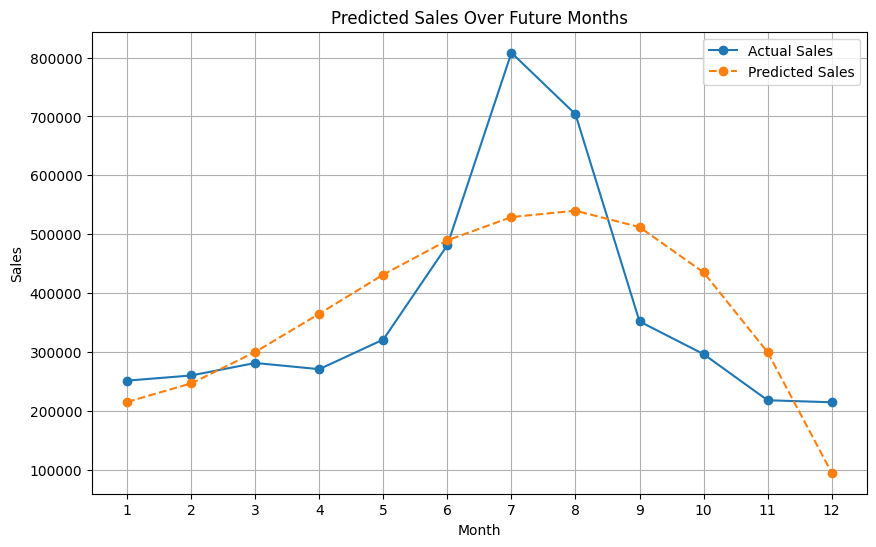

In [77]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

months = np.arange(1, 13)
tv_sold = [251353, 260113, 281343, 270841, 321164, 481399, 808157, 703693, 351850, 296351, 218058, 214639]

X = months.reshape(-1, 1)  # Features
y = tv_sold                # Target variable

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

future_months = np.arange(1, 13).reshape(-1, 1)
future_months_poly = poly.transform(future_months)
predicted_sales = model.predict(future_months_poly)

# Visualize Results
plt.figure(figsize=(10, 6))
plt.plot(months, tv_sold, marker='o', label='Actual Sales')
plt.plot(future_months, predicted_sales, marker='o', linestyle='dashed', label='Predicted Sales')
plt.title('Predicted Sales Over Future Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.savefig('predicted_sales.png')
plt.show()


## ML Analysis Model 2

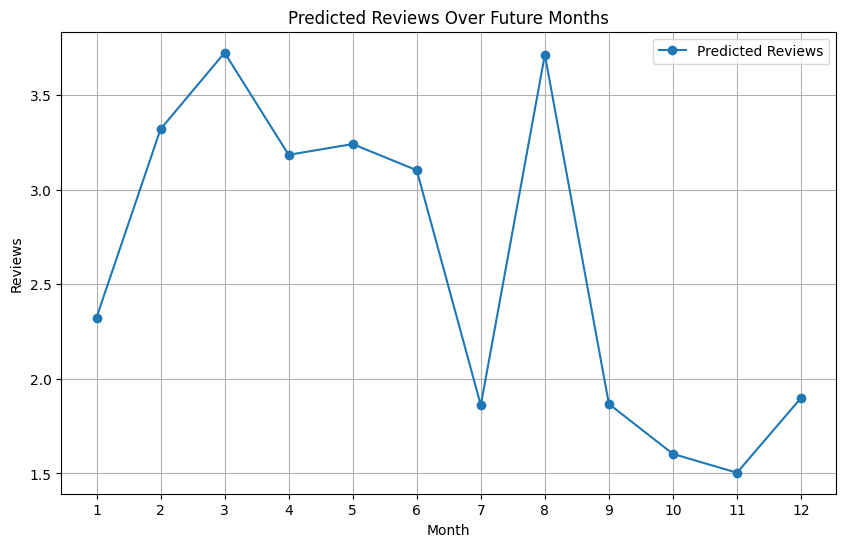

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

df = pd.read_csv('TV Reviews - Sheet1_new.csv')



X = df[['Month']]  
y = df['Review']  

model = RandomForestRegressor(random_state=1)
model.fit(X, y)

future_months = pd.DataFrame({'Month': range(1, 13)})
predicted_reviews = model.predict(future_months)
# print(predicted_total)
plt.figure(figsize=(10, 6))
plt.plot(future_months['Month'], predicted_reviews, marker='o', label='Predicted Reviews')
plt.title('Predicted Reviews Over Future Months')
plt.xlabel('Month')
plt.ylabel('Reviews')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True)
plt.savefig('predicted_total_reviews.png')
plt.show()






#### Final Analysis

We saw that the predicted sales goes up during the spring/summer from january to august, and is low between september to december. However, the review ratings we get during that time seem to be related as the lowest predicted ratings are during the fall/winter season between september to december. And then slowly goes up once the spring/summer season arrives from february to june. An outlier noticed is that July has a really low rating which we believe is correlated to the high number of tv's sold per in july. So, our conclusion is that the season that people purchase TV's correlate to the type of review given for each TV.